In [1]:
import sys
import os 

library_path = os.path.join('..', '..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from UCB_train import UCB_trainer

from pathlib import Path
import matplotlib.pyplot as plt
from neuralhydrology.evaluation.metrics import calculate_all_metrics

from neuralhydrology.utils.errors import AllNaNError
from neuralhydrology.utils.config import Config
from neuralhydrology.evaluation.utils import metrics_to_dataframe
from neuralhydrology.evaluation.metrics import calculate_metrics, get_available_metrics
from neuralhydrology.datautils.utils import get_frequency_factor, sort_frequencies

import argparse
import pickle
import sys
from collections import defaultdict

from pathlib import Path
from typing import List

import numpy as np
import pandas as pd
import xarray as xr
from tqdm import tqdm




In [8]:
path_to_csv = Path('.')

params = {'learning_rate': 0.001, 'batch_size': 256, 'epochs': 5, 'validate_every': 5, 'save_weights_every': 5}
num_ensemble_members = 1
trainer = UCB_trainer(path_to_csv, params, num_ensemble_members, physics_informed=True)

In [9]:
trainer.train()

2024-10-30 11:43:08,736: Logging to /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114308/output.log initialized.
2024-10-30 11:43:08,738: ### Folder structure created at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114308
2024-10-30 11:43:08,739: ### Run configurations for testing_run
2024-10-30 11:43:08,740: experiment_name: testing_run
2024-10-30 11:43:08,740: train_basin_file: train_basin_file_template
2024-10-30 11:43:08,741: validation_basin_file: train_basin_file_template
2024-10-30 11:43:08,742: test_basin_file: train_basin_file_template
2024-10-30 11:43:08,742: train_start_date: 1981-10-01 00:00:00
2024-10-30 11:43:08,743: train_end_date: 1997-09-30 00:00:00
2024-10-30 11:43:08,743: validation_start_date: 1997-10-01 00:00:00
2024-10-30 11:43:08,744: validation_end_date: 2000-09-30 00:00:00
2024-10-30 11:43:08,745: test_start_date: 2000-10-01 00:00:00
2024-10-30 1

/Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]
2024-10-30 11:44:59,242: Stored metrics at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114308/test/model_epoch005/test_metrics.csv
2024-10-30 11:44:59,244: Stored results at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114308/test/model_epoch005/test_results.p


/Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


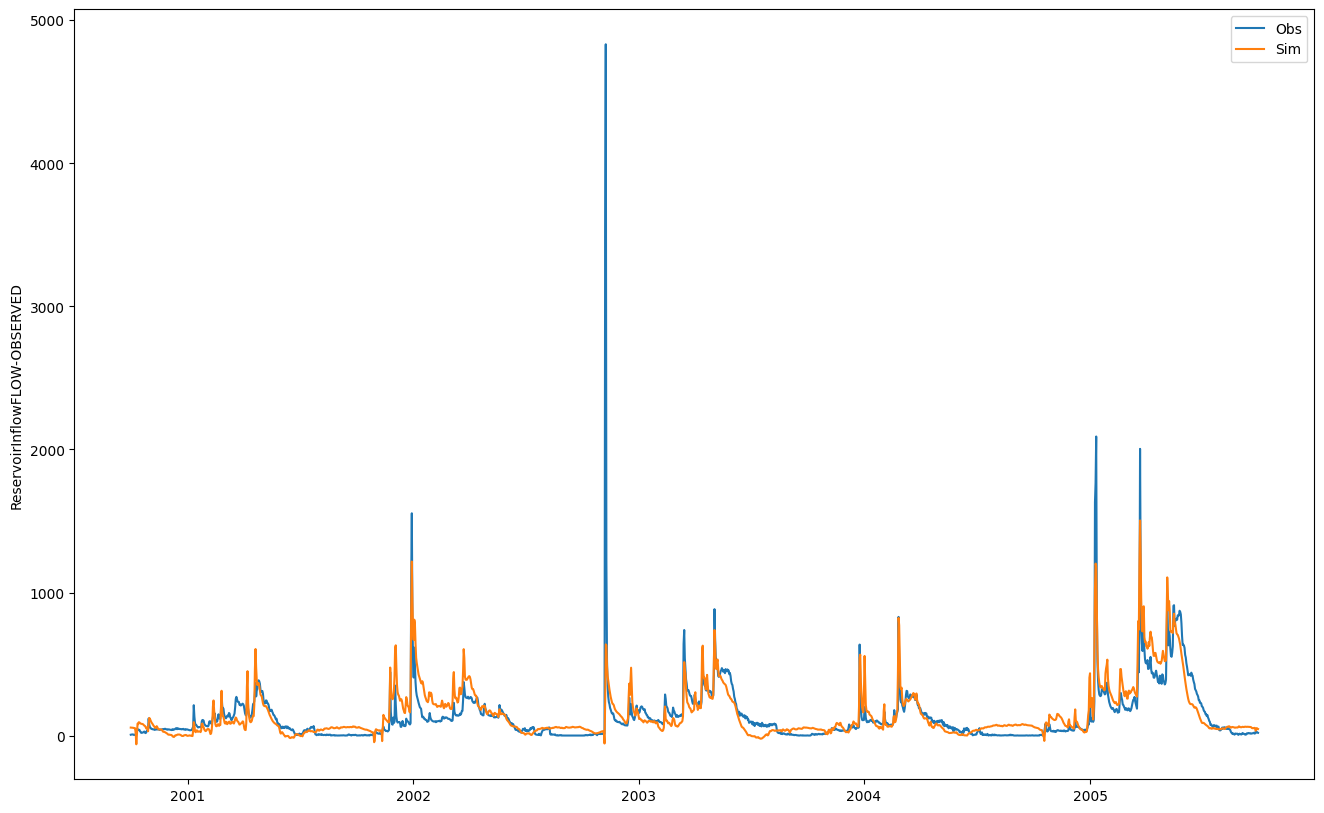

{'NSE': 0.5452219843864441,
 'MSE': 23320.22265625,
 'RMSE': 152.70960237080706,
 'KGE': 0.6604184336670016,
 'Alpha-NSE': 0.8001242876052856,
 'Beta-KGE': 1.0962051153182983,
 'Beta-NSE': 0.05808819830417633,
 'Pearson-r': 0.7428815145220575,
 'FHV': -22.23655879497528,
 'FMS': -14.800527951275935,
 'FLV': -773.4883267448561,
 'Peak-Timing': 0.14285714285714285,
 'Peak-MAPE': 27.037271431514192}

In [11]:
trainer.results()

In [14]:
path_to_csv = Path('.')
params = {'learning_rate': 0.001, 'batch_size': 256, 'epochs': 1, 'validate_every': 1, 'save_weights_every': 1}
num_ensemble_members = 2
trainer = UCB_trainer(path_to_csv, params, num_ensemble_members)

In [15]:
trainer.train()

2024-10-30 11:49:04,877: Logging to /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/output.log initialized.
2024-10-30 11:49:04,878: ### Folder structure created at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904
2024-10-30 11:49:04,879: ### Run configurations for testing_run
2024-10-30 11:49:04,880: experiment_name: testing_run
2024-10-30 11:49:04,881: train_basin_file: train_basin_file_template
2024-10-30 11:49:04,882: validation_basin_file: train_basin_file_template
2024-10-30 11:49:04,883: test_basin_file: train_basin_file_template
2024-10-30 11:49:04,884: train_start_date: 1981-10-01 00:00:00
2024-10-30 11:49:04,885: train_end_date: 1997-09-30 00:00:00
2024-10-30 11:49:04,887: validation_start_date: 1997-10-01 00:00:00
2024-10-30 11:49:04,888: validation_end_date: 2000-09-30 00:00:00
2024-10-30 11:49:04,890: test_start_date: 2000-10-01 00:00:00
2024-10-30 1

/Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]
2024-10-30 11:50:10,281: Stored metrics at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/test/model_epoch001/test_metrics.csv
2024-10-30 11:50:10,282: Stored results at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/test/model_epoch001/test_results.p
2024-10-30 11:50:10,298: Using the model weights from /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/testing_run_3010_114934/model_epoch001.pt


/Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]
2024-10-30 11:50:12,069: Stored metrics at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/testing_run_3010_114934/test/model_epoch001/test_metrics.csv
2024-10-30 11:50:12,071: Stored results at /Users/abhisheksuresh/Updated Folder/UCB-USACE-LSTMs/neuralhydrology/UCB_training/runs/testing_run_3010_114904/testing_run_3010_114934/test/model_epoch001/test_results.p
Loading results for each run.


100%|██████████| 2/2 [00:00<00:00, 740.72it/s]


Combining results and calculating metrics.


100%|██████████| 1/1 [00:00<00:00, 124.81it/s]


In [16]:
trainer.results()

TypeError: 'NoneType' object is not subscriptable